# Investigating Netflix Movies

<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Exploratory Data Analysis (EDA)

1. ###  Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. ### Load the dataset

In [2]:
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

3. ### Data Overview

In [3]:
# A preview of the first five rows of the dataset
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


**Note:** From the output of the previous step there is no need to cleaning:
1. no missing values
2. no duplicates 
3. the proper Data Type

4. ### Subseting & Filter the data

In [5]:
# Filter the data for movies released in the 1990s
movies_1990s = netflix_df[(netflix_df['type'] == 'Movie') & 
                            (netflix_df['release_year'] >= 1990) & 
                            (netflix_df['release_year'] < 2000)]


# Preview the filtered dataset
movies_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


5. ### Answer questions

#### Question 1: What was the most frequent movie duration in the 1990s?
We will find the most common movie duration using the mode function.

In [6]:
# Find the most frequent movie duration
duration = movies_1990s['duration'].mode()[0]

#### Question 2: How many short action movies were released in the 1990s?
Short movies are defined as those with a duration of less than 90 minutes. We will filter out action movies from the 1990s that are less than 90 minutes long.

In [7]:
# Identify short action movies (duration < 90 minutes)
short_action_movies = movies_1990s[(movies_1990s['duration'] < 90) & 
                                   (movies_1990s['genre'].str.contains('Action', case=False, na=False))]

short_movie_count = len(short_action_movies)

#### Question 3: How many short movies (under 90 minutes) were released each year during the 1990s?
We will group the short movies by release year and count how many were released each year, then visualize the trend using a bar chart.

In [9]:
# Group short movies by release year
short_movies_yearly = movies_1990s[movies_1990s['duration'] < 90].groupby('release_year').size()

6. ### Visualizations

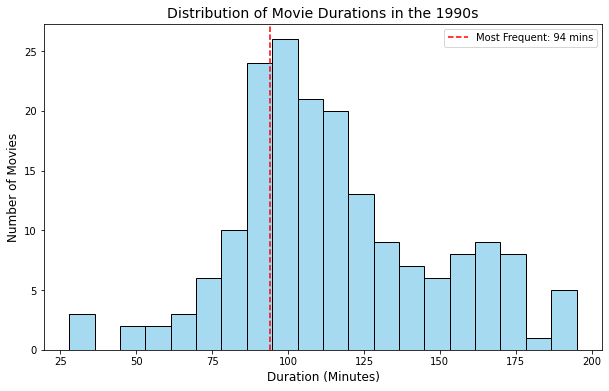

In [10]:
# Visualization 1: Distribution of Movie Durations
plt.figure(figsize=(10, 6))
sns.histplot(movies_1990s['duration'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Distribution of Movie Durations in the 1990s', fontsize=14)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.axvline(duration, color='red', linestyle='--', label=f'Most Frequent: {duration} mins')
plt.legend()
plt.show()

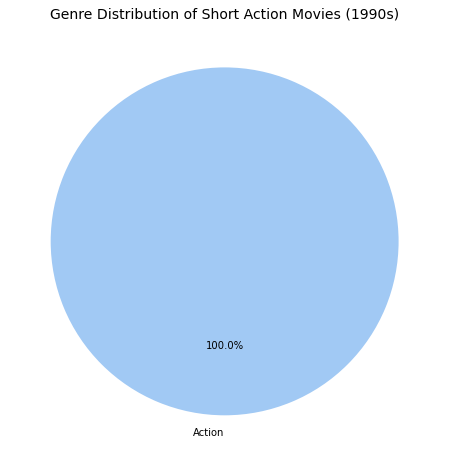

In [11]:
# Visualization 2: Genre Distribution of Short Action Movies
if len(short_action_movies) > 0:
    genre_counts = short_action_movies['genre'].value_counts()
    plt.figure(figsize=(8, 8))
    genre_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Genre Distribution of Short Action Movies (1990s)', fontsize=14)
    plt.ylabel('')
    plt.show()
else:
    print("No short action movies to display.")

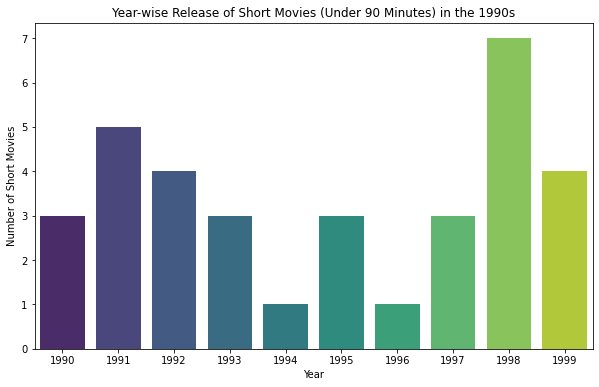

In [12]:
# Visualization 2: Year-wise Release of Short Movies (Under 90 Minutes)
plt.figure(figsize=(10, 6))
sns.barplot(x=short_movies_yearly.index, y=short_movies_yearly.values, palette="viridis")
plt.title("Year-wise Release of Short Movies (Under 90 Minutes) in the 1990s")
plt.xlabel("Year")
plt.ylabel("Number of Short Movies")
plt.show()

**A bar chart displayed how short movies (under 90 minutes) were released each year in the 1990s.**

7. ### Summary

In [15]:
# Outputting the summary of findings
summary = {
    'Most Frequent Duration (1990s Movies)': duration,
    'Short Action Movie Count (1990s)': short_movie_count,
    'Year-wise Release of Short Movies': max(short_movies_yearly)
}
print(summary)

{'Most Frequent Duration (1990s Movies)': 94, 'Short Action Movie Count (1990s)': 7, 'Year-wise Release of Short Movies': 7}
